In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

import pycollocation

<h2>Textbook example: Basic New Keynesian Model</h2>

<h2> Households </h2>
Suppose that representative household wishes to maximize...

$$\int_{t=0}^{\infty} e^{-\rho t}u(C(t), N(t))L(t)dt$$

...where the flow utility function $u(C(t), N(t))$ is assumed to be additively separable in its two arguments consumption, $C(t)$, and labor supply, $N(t)$ (both measured per member of the household). Note that $L(t)$, the size of the representative household, is assumed to grow at a constant and exogenous rate $n$. 

The representative household faces the following intertemporal budget constraint...

$$\dot{B}(t) = i(t)B(t) + W(t)N(t)L(t) - P(t)C(t)L(t)$$

...where $i(t)$ is the nominal interest rate, $B(t)$ is the quantity of bonds held by the representative household, $W(t)$ is the nominal wage paid for labor, and $P(t)$ is the price of consumption goods.

<h3> Solution to the household problem </h3>

Form the Hamiltonian...

$$ H(t, B, C, N, \lambda) \equiv e^{-\rho t}u(C(t), N(t))L(t) + \lambda(t)\bigg[i(t)B(t) + W(t)N(t)L(t) - P(t)C(t)L(t)\bigg] $$

...differentiate with respect to control variables $C$ and $N$ and the state variable $B$...

\begin{align}
    \frac{\partial H}{\partial C} \equiv& e^{-\rho t}\frac{\partial u}{\partial C}L(t) - P(t)L(t)\lambda(t) \\
    \frac{\partial H}{\partial N} \equiv& e^{-\rho t}\frac{\partial u}{\partial N}L(t) - W(t)L(t)\lambda(t)\\
    \frac{\partial H}{\partial B} \equiv& i(t)\lambda(t)
\end{align}

...the state and costate equations are...

\begin{align}
    \dot{B}(t) = \frac{\partial H}{\partial \lambda} =& i(t)B(t) + W(t)N(t)L(t) - P(t)C(t)L(t) \\
    \dot{\lambda} = -\frac{\partial H}{\partial B} =& -i(t)\lambda(t)\\
\end{align}


After a bit of algebra (TODO: Add algebra!), we find that the behavior of the representative household is described by the consumption Euler equation...

$$ \frac{\dot{C}}{C} = \frac{1}{R(C)}\bigg[(i - \pi) - \rho\bigg] $$

...where...

$$ R(C) = -\frac{C\frac{\partial^2 u}{\partial C^2}}{\frac{\partial u}{\partial C}}$$

...is the <a href="https://en.wikipedia.org/wiki/Risk_aversion">Pratt-Arrow measure of relative risk aversion</a>. Consumption Euler equation says that consumption growth is proportional to the gap between the real interest rate $i - \pi$ and the discount rate $\rho$; and inversely proportional to risk preferences.


a first-order condition describing the trade-off between consumption and labor supply...

$$ \frac{W}{P}\frac{\partial u}{\partial C} = -\frac{\partial u}{\partial N} $$

...and the budget constraint...

$$\dot{B}(t) = i(t)B(t) + W(t)N(t)L(t) - P(t)C(t)L(t).$$



<h2> Final goods producers </h2>

Competitive final goods firm produces consumption goods using a continuum of intermediate inputs...

$$ Y = \Bigg[\int_0^1 y_j^{\frac{\epsilon - 1}{\epsilon}}dj\Bigg]^{\frac{\epsilon}{\epsilon - 1}} $$

...final goods firm solves static cost minimization problem...

$$\min_{y_j} \int_0^1 p_jy_jdj$$

...subject to feasibility constraint...

$$ Y = \Bigg[\int_0^1 y_j^{\frac{\epsilon - 1}{\epsilon}}dj\Bigg]^{\frac{\epsilon}{\epsilon - 1}}. $$

<h3> Solution to the firms problem </h3>

Form the Lagrangian...

$$ \mathcal{L} \equiv \int_0^1 p_jy_jdj + \lambda\Bigg(Y - \Bigg[\int_0^1 y_j^{\frac{\epsilon - 1}{\epsilon}}dj\Bigg]^{\frac{\epsilon}{\epsilon - 1}}\Bigg)$$

First-order conditions are...

$$ p_j - \lambda\frac{y_j^{-\frac{1}{\epsilon}}}{\int_0^1 y_j^{\frac{\epsilon - 1}{\epsilon}}dj}Y = 0\ \forall j$$

After quite a bit of algebra you can derive the firm's demand function for intermediate input $j$ as a function of its own price $p_j$ and the aggregate price level $P$ and output $Y$...

\begin{align}
    %\frac{p_i}{p_j} =& \frac{y_i^{-\frac{1}{\epsilon}}}{y_j^{-\frac{1}{\epsilon}}}
    %\frac{y_i}{y_j} =& \bigg(\frac{p_i}{p_j}\bigg)^{-\epsilon}
    %y_i =& \bigg(\frac{p_i}{p_j}\bigg)^{-\epsilon}y_j
    %p_iy_i =& p_i\bigg(\frac{p_i}{p_j}\bigg)^{-\epsilon}y_j
    %\int_0^1p_iy_idi =& \int_0^1p_i\bigg(\frac{p_i}{p_j}\bigg)^{-\epsilon}y_j di
    %\int_0^1p_iy_idi =& y_j\bigg(\frac{1}{p_j}\bigg)^{-\epsilon}\int_0^1p_i^{1-\epsilon} di
    %PY =& y_j\bigg(\frac{1}{p_j}\bigg)^{-\epsilon}\int_0^1p_i^{1-\epsilon} di
    y_j(p_j) =& \bigg(\frac{p_j}{P}\bigg)^{-\epsilon}Y
\end{align}

where

$$ P = \bigg[\int_0^1p_i^{1-\epsilon}\bigg]^{\frac{1}{1 - \epsilon}}. $$


$$0 = i^* + \phi_X X + \phi_{\pi} \pi - \pi - \rho - g$$
$$ 0 = \rho\pi - \frac{\epsilon - 1}{\theta} \bigg(X^{1 + \psi} - 1\bigg)$$

In [30]:
from scipy import optimize


def nominal_interest_rate(X, pi, i_star, phi_X, phi_pi):
    """Nominal interest rate follows a Taylor rule."""
    return i_star + phi_X * np.log(X) + phi_pi * pi
    
def output_gap(X, pi, g, i_star, phi_X, phi_pi, rho):
    i = nominal_interest_rate(X, pi, i_star, phi_X, phi_pi)
    return (i - pi - rho - g) * X

def inflation(X, pi, epsilon, psi, rho, theta):
    return rho * pi - ((epsilon - 1) / theta) * (X**(1 + psi) - 1)

def basic_nk_model(t, X, pi, epsilon, g, i_star, phi_X, phi_pi, psi, rho, theta, **params):
    out = [output_gap(X, pi, g, i_star, phi_X, phi_pi, rho),
           inflation(X, pi, epsilon, psi, rho, theta)]
    return out

def terminal_condition(t, X, pi, initial_guess, **params):
    X_star, pi_star = find_equilibrium(initial_guess, params)
    out = [X - X_star, pi - pi_star]
    return out

def _equilibrium_system(vec, params):
    X, pi = vec
    return basic_nk_model(0.0, X, pi, **params)
    
def find_equilibrium(initial_guess, params):
    result = optimize.root(_equilibrium_system,
                           x0=initial_guess,
                           args=(params))
    if result.success:
        return result.x
    else:
        return result

In [27]:
basic_nk_model(0.0, 1.0, 0.0, 0.1, 0.05, 0.1, 1.0, 0.5, 1.5, 0.05, 1.0)

[0.0, 0.0]

To complete the model we need to define some parameter values.

In [32]:
params = {'epsilon': 0.02, 'g': 0.05, 'i_star': 0.05, 'phi_X': 1.0, 'phi_pi': 0.5,
          'psi': 1.5, 'rho': 0.05, 'theta': 1.0, 'initial_guess': np.array([0.5, 0.5])}

In [29]:
find_equilibrium(np.array([0.5, 0.5]), params)

array([ 1.0019581 , -0.09608764])

<h2>Solving the model with pyCollocation</h2>

<h3>Defining a `pycollocation.TwoPointBVP` instance</h3>

In [5]:
pycollocation.problems.TwoPointBVP?

In [31]:
basic_nk_bvp = pycollocation.problems.TwoPointBVP(bcs_lower=None,
                                                  bcs_upper=terminal_condition,
                                                  number_bcs_lower=0,
                                                  number_odes=2,
                                                  params=params,
                                                  rhs=basic_nk_model,
                                                  )

### Finding a good initial guess for $k(t)$

Theory tells us that, starting from some initial condition $k_0$, the solution to the Solow model converges monotonically toward its long run equilibrium value $k^*$. Our initial guess for the solution should preserve this property...

In [7]:
def initial_mesh(t, T, num, problem):
    # compute equilibrium values
    X_star, pi_star = find_equilibrium(initial_guess, problem.params)

    ts = np.linspace(t, T, num)
    Xs = X_star - (X_star - problem.params['k0']) * np.exp(-ts)
    pis = pi_star - (pi_star - problem.params['k0']) * np.exp(-ts)

    return ts, Xs, pis


### Solving the model

In [8]:
pycollocation.solvers.Solver?

<h3> Polynomial basis functions </h3>

In [9]:
polynomial_basis = pycollocation.basis_functions.PolynomialBasis()
solver = pycollocation.solvers.Solver(polynomial_basis)

boundary_points = (0, 100)
ts, ks, cs = initial_mesh(*boundary_points, num=1000, problem=standard_ramsey_bvp)

basis_kwargs = {'kind': 'Chebyshev', 'domain': boundary_points, 'degree': 15}
k_poly = polynomial_basis.fit(ts, ks, **basis_kwargs)
c_poly = polynomial_basis.fit(ts, cs, **basis_kwargs)
initial_coefs = np.hstack([k_poly.coef, c_poly.coef])
nodes = polynomial_basis.roots(**basis_kwargs)

solution = solver.solve(basis_kwargs, boundary_points, initial_coefs,
                        nodes, standard_ramsey_bvp)


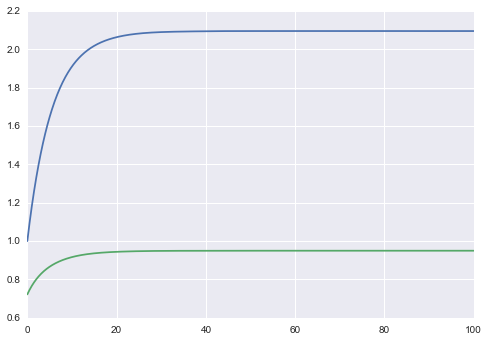

In [19]:
ts, _, _ = initial_mesh(basis_kwargs['domain'], 1000, standard_ramsey_bvp)
k_soln, c_soln = solution.evaluate_solution(ts)
plt.plot(ts, k_soln)
plt.plot(ts, c_soln)
plt.show()

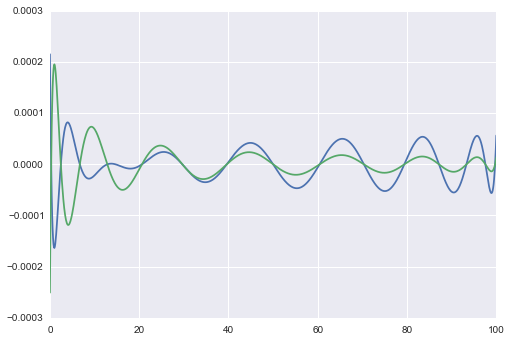

In [10]:
k_resids, c_resids = solution.evaluate_residual(ts)
plt.plot(ts, k_resids)
plt.plot(ts, c_resids)

plt.show()

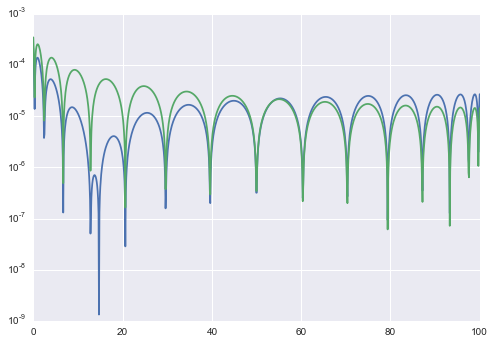

In [11]:
k_normalized_resids, c_normalized_resids = solution.normalize_residuals(ts)
plt.plot(ts, np.abs(k_normalized_resids))
plt.plot(ts, np.abs(c_normalized_resids))
plt.yscale('log')
plt.show()

<h3> B-spline basis functions </h3>

In [16]:
bspline_basis = pycollocation.basis_functions.BSplineBasis()
solver = pycollocation.solvers.Solver(bspline_basis)

boundary_points = (0, 100)
ts, ks, cs = initial_mesh(*boundary_points, num=250, problem=standard_ramsey_bvp)

tck, u = bspline_basis.fit([ks, cs], u=ts, k=5, s=0)
knots, coefs, k = tck
initial_coefs = np.hstack(coefs)

basis_kwargs = {'knots': knots, 'degree': k, 'ext': 2}
nodes = np.linspace(*boundary_points, num=249) 

solution = solver.solve(basis_kwargs, boundary_points, initial_coefs,
                        nodes, standard_ramsey_bvp)


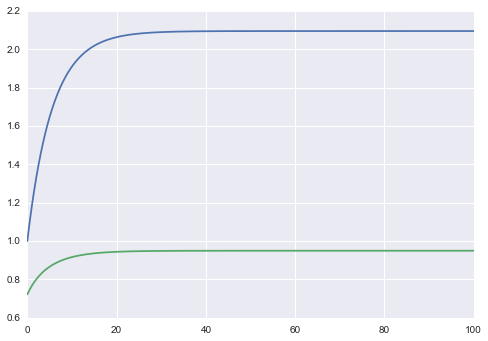

In [17]:
ts, _, _ = initial_mesh(*boundary_points, num=1000, problem=standard_ramsey_bvp)
k_soln, c_soln = solution.evaluate_solution(ts)
plt.plot(ts, k_soln)
plt.plot(ts, c_soln)
plt.show()

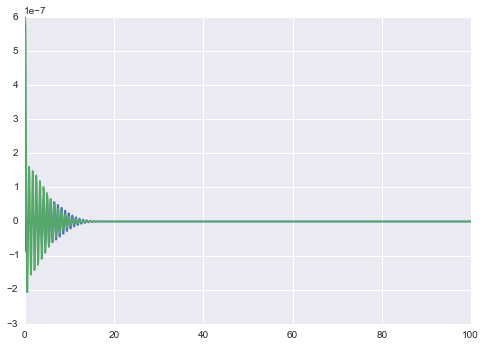

In [18]:
k_resids, c_resids = solution.evaluate_residual(ts)
plt.plot(ts, k_resids)
plt.plot(ts, c_resids)

plt.show()

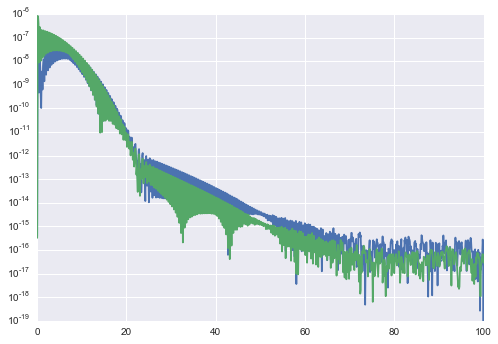

In [19]:
k_normalized_resids, c_normalized_resids = solution.normalize_residuals(ts)
plt.plot(ts, np.abs(k_normalized_resids))
plt.plot(ts, np.abs(c_normalized_resids))
plt.yscale('log')
plt.show()

<h1> Generic Ramsey-Cass-Koopmans model</h1>

Can we refactor the above code so that we can solve a Ramsey-Cass-Koopmans model for arbitrary $f$ and $u$? Yes!

In [30]:
from pycollocation.tests import models

Example usage...

In [31]:
def ces_output(k, alpha, sigma, **params):
    gamma = (sigma - 1) / sigma
    if gamma == 0:
        y = k**alpha
    else:
        y = (alpha * k**gamma + (1 - alpha))**(1 / gamma)
    return y


def ces_mpk(k, alpha, sigma, **params):
    y = ces_output(k, alpha, sigma)
    gamma = (sigma - 1) / sigma
    if gamma == 0:
        mpk = alpha * (y / k)
    else:
        mpk = alpha * k**(gamma - 1) * (y / (alpha * k**gamma + (1 - alpha)))
    return mpk


def crra_risk_aversion(t, c, theta, **params):
    return theta


def ces_equilibrium_capital(alpha, delta, g, n, rho, sigma, theta, **params):
    """Steady state value for capital stock (per unit effective labor)."""
    gamma = (sigma - 1) / sigma
    if gamma == 1:
        kss = (alpha / (delta + rho + theta * g))**(1 / (1 - alpha))
    else:
        kss = ((1 / (1 - alpha)) * (((delta + rho + theta * g) / alpha)**(gamma / (1 - gamma)) - alpha))**(-1 / gamma)
    return kss


ces_params = {'g': 0.02, 'theta': 1.0, 'n': 0.02, 'alpha': 0.15, 'delta': 0.04,
              'sigma': 0.5, 'rho': 0.02, 'k0': 1.0}

In [32]:
generic_ramsey_bvp = models.RamseyCassKoopmansModel(crra_risk_aversion,
                                                    ces_output,
                                                    ces_equilibrium_capital,
                                                    ces_mpk,
                                                    ces_params)

In [33]:
polynomial_basis = pycollocation.basis_functions.PolynomialBasis()
solver = pycollocation.solvers.Solver(polynomial_basis)

basis_kwargs = {'kind': 'Chebyshev', 'domain': [0, 100], 'degree': 15}

ts, ks, cs = initial_mesh(basis_kwargs['domain'], 1000, standard_ramsey_bvp)
k_poly = polynomial_basis.fit(ts, ks, **basis_kwargs)
c_poly = polynomial_basis.fit(ts, cs, **basis_kwargs)
initial_coefs = np.hstack([k_poly.coef, c_poly.coef])

solution = solver.solve(basis_kwargs, initial_coefs, standard_ramsey_bvp)


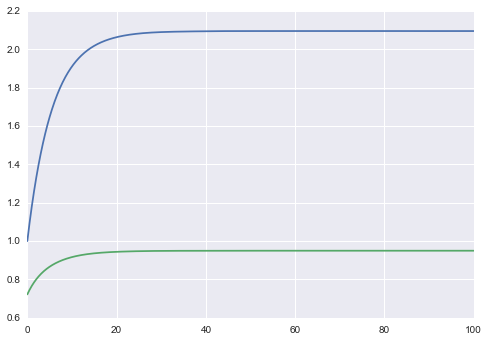

In [34]:
k_soln, c_soln = solution.evaluate_solution(ts)
plt.plot(ts, k_soln)
plt.plot(ts, c_soln)
plt.show()

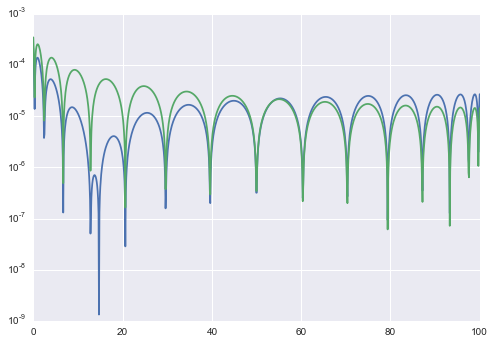

In [35]:
k_normalized_resids, c_normalized_resids = solution.normalize_residuals(ts)
plt.plot(ts, np.abs(k_normalized_resids))
plt.plot(ts, np.abs(c_normalized_resids))
plt.yscale('log')
plt.show()